构造一个完整的梯度下降算法
===

##### 数据校验

In [7]:
def validate(X, Y):
    if len(X) != len(Y):   # 保证X和Y的维度相同
        raise Exception("参数异常")   # —— raise 抛出异常
    else:
        m = len(X[0])   # 获取行的长度，即维度
        for L in X:
            if len(L) != m:   # 保证X每一行的数据相同，是一个完整的矩阵
                raise Exception("参数异常")
        if len(Y[0]) != L:   # 保证Y只有1列，即1维度
            raise Exception("参数异常")

##### 计算预测值和实际值的差值，即 ax - y 的值

In [8]:
def calcDiffe(x, y, a):
    lx = len(x)
    la = len(a)
    if lx == la:   # 保证a和x的维度相同，可以进行相乘
        result = 0
        for i in range(lx):
            result += x[i] * a[i]
        return y - result   # 返回的是b的值
    
    elif lx + 1 == la:
        result = 0
        for i in range(lx):
            result += x[i] * a[i]
        result += 1 * a[lx] # 加上常数项
        return y - result
    
    else :
        raise Exception("参数异常")

##### 模型训练

In [9]:
def fit(X, Y, alphas, threshold=1e-6, maxIter=200, addConstantItem=True):   # theate矩阵 * X = Y
    '''
    X是m*n二维矩阵，m为样本数目，n是特征数量
    '''
    # maxIter 迭代次数 ；实现了CV的功能，即选出最优alphas
    # threshold 阈值，收敛次数
    
    import math
    import numpy as np
    
    ## 校验
    validate(X, Y)
    
    ## 开始模型构建
    L = len(alphas)   # 样本个数
    m = len(Y)   # Y的维度
    n = len(X[0]) + 1 if addConstantItem else len(X[0])   # 特征的数量
    B = [True for i in range(L)]   # 模型的格式：控制最优模型
    
    ## 损失值初始化
    J = [np.nan for i in range(L)]   # loss函数的值 J = [np.nan]
    
    # 1. 初始化L*n的list
    a = [[0 for j in range(n)] for i in range(L)]   # a是theta矩阵，模型的系数；这是一个L行n列的向量
    
    # 2. 开始计算
    for times in range(maxIter):
        for i in range(L):   # 针对每个样本得到一个解
            if not B[i]:   # 如果当前alpha的值已经计算到最优解了，那么不进行继续计算continue进入下一个循环
                continue
            
            ta = a[i]   # 获取一行，即ta是一个1行n列的向量
            for j in range(n): 
                alpha = alphas[i]   # 对每一个特征，得到它的alpha值
                ts = 0
                for k in range(m):
                    if j == n - 1 and addConstantItem:
                        ts += alpha*calcDiffe(X[k], Y[k][0], a[i]) * 1
                    else:
                        ts += alpha*calcDiffe(X[k], Y[k][0], a[i]) * X[k][j]
                t = ta[j] + ts·
                ta[j] = t
                
            ## 计算完一个alpha值的0的损失函数
            flag = True
            js = 0
            for k in range(m):
                js += math.pow(calcDiffe(X[k], Y[k][0], a[i]),2)+a[i][j]   # js 误差 ；a[i][j]实质上是常数项
                if js > J[i]:
                    flag = False
                    break;
            if flag:
                J[i] = js
                for j in range(n):
                    a[i][j] = ta[j]
            else:
                # 标记当前alpha的值不需要再计算了
                B[i] = False     
        
        ## 计算完一个迭代，当目标函数/损失函数值有一个小于threshold时就结束循环，即舍去小于10^-6的theata
        r = [0 for j in J if j <= threshold]
        if len(r) > 0:
            break
            
        # 如果全部alphas的值都结算到最后解了，则结束计算，跳出循环
        r = [0 for b in B if not b]
        if len(r) > 0:
            break

    # 3. 获取最优的alphas的值以及对应的theata值
    min_a = a[0]
    min_j = J[0]
    min_alpha = alphas[0]
    for i in range(L):
        if J[i] < min_j:
            min_j = J[i]
            min_a = a[i]
            min_alpha = alphas[i]
    
    print("最优的alpha值为:",min_alpha)
    
    # 4. 返回最终的theata值
    return min_a

##### 预测结果

In [10]:
def predict(X,a):   # 这个a就理解成theata
    Y = []
    n = len(a) - 1
    for x in X:
        result = 0
        for i in range(n):
            result += x[i] * a[i]
        result += a[n]   # 最后一个theata没有xi
        Y.append(result)
    return Y

##### 计算实际值和预测值之间的相关性

In [11]:
def calcRScore(y,py):
    if len(y) != len(py):   # 保证实际Y值和预测Y值维度相同
        raise Exception("参数异常")
        
    import math 
    import numpy as np
    
    avgy = np.average(y)   # range是从0开始算的，len是从1开始算的
    m = len(y)
    rss = 0.0
    tss = 0
    for i in range(m):
        rss += math.pow(y[i] - py[i], 2)   # —— pow(x,y)： 返回 x^y
        tss += math.pow(y[i] - avgy, 2)
    r = 1.0 - 1.0 * rss / tss   # 回归算法R^2计算公式
    return r

# 梯度下降法

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge, LassoCV, RidgeCV, ElasticNetCV

from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [6]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

##### 1、创建训练数据和测试数据

In [11]:
np.random.seed(0)

# 创建训练数据
N = 10
x = np.linspace(0, 6, N) + np.random.randn(N)   # 加上了一个随机数
y = 1.8*x**3 + x**2 - 14*x - 7 + np.random.randn(N)
x.shape = (-1, 1)
y.shape = (-1, 1)

# 创建测试数据
x_test = np.linspace(x.min(), x.max(), num=100)
x_test.shape = (-1,1)

plt.figure(figsize=(12,6), facecolor='w')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

##### 2.1、Python自带模型

    模型自带了梯度下降功能

In [9]:
model = LinearRegression()
model.fit(x,y)

y_predict = model.predict(x_test)
s1 = model.score(x,y)

print(s1)
print("参数列表:", model.coef_)
print("截距:", model.intercept_)

0.8374376988248429
参数列表: [[72.0576022]]
截距: [-163.71132966]


##### 2.2、自定义线性模型

In [25]:
ma = fit(x,y,np.logspace(-4,-2,100), addConstantItem=True)
y_predict2 = predict(x_test, ma)

s2 = calcRScore(y, predict(x,ma))
print ("自定义实现模型=============")
print ("参数列表:", ma)

最优的alpha值为: 0.01
自定义实现模型=============
参数列表: [70.87936393633888, -158.4997458365991]


##### 3、绘制自定义线性模型和python模型对比图

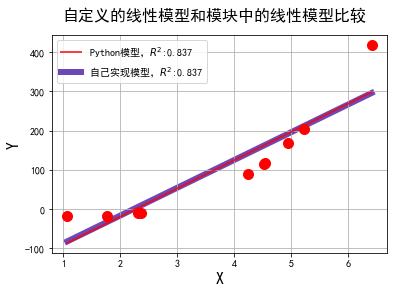

In [32]:
plt.plot(x, y, 'ro', ms=10, zorder=3)
plt.plot(x_test, y_predict, color='red', lw=2, alpha=0.75, label='Python模型，$R^2$:%.3f' % s1, zorder=2)  # $  $ ：更换之间的运算符 ★
plt.plot(x_test, y_predict2, color='#6d49b6', lw=6, alpha=1, label='自己实现模型，$R^2$:%.3f' % s2, zorder=1)
plt.legend(loc = 'upper left')

plt.grid(True)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.suptitle(u'自定义的线性模型和模块中的线性模型比较', fontsize=16)
plt.show()

自带梯度下降法R方: 0.9999999989274823


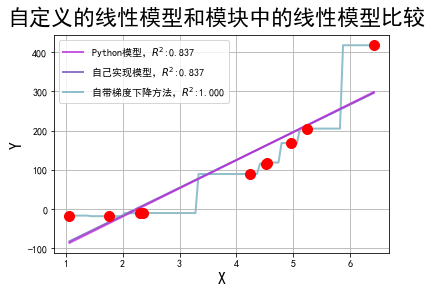

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
y1 = y.ravel()
clf.fit(x,y1)
print ("自带梯度下降法R方:", clf.score(x,y1))
y_predict3=clf.predict(x_test)
s3=calcRScore(y, clf.predict(x))

## 开始画图
plt.plot(x, y, 'ro', ms=10, zorder=3)
plt.plot(x_test, y_predict, color='#b624db', lw=2, alpha=0.75, label=u'Python模型，$R^2$:%.3f' % s1, zorder=2)
plt.plot(x_test, y_predict2, color='#6d49b6', lw=2, alpha=0.75, label=u'自己实现模型，$R^2$:%.3f' % s2, zorder=1)
plt.plot(x_test, y_predict3, color='#6daaba', lw=2, alpha=0.75, label=u'自带梯度下降方法，$R^2$:%.3f' % s3, zorder=1)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.suptitle(u'自定义的线性模型和模块中的线性模型比较', fontsize=22)
plt.show()